### <font color=blue>Javier Antonio García Perdomo </font>
### <font color=red>21004161</font>
### Maestría en Data Science
### <font color=green>Statistical Learning I, Seccion V </font>
### <font color=red>05/05/2021</font>

### <h1><center><font color=green>Laboratorio 1 - Regresión Simple Lineal</font> 

#### Importando paquetes

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#### Descargando los Datos

FuelConsumptionCo2.csv =  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

#### Importando datos

In [11]:
df = pd.read_csv('/Users/xuxho/Downloads/FuelConsumptionCo2.csv')
# un vistazo dentro del set de datos
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Exploración de datos

In [12]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [42]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,2.0,4,8.5,196,9.9,6.7
1,2.4,4,9.6,221,11.2,7.7
2,1.5,4,5.9,136,6.0,5.8
3,3.5,6,11.1,255,12.7,9.1
4,3.5,6,10.6,244,12.1,8.7


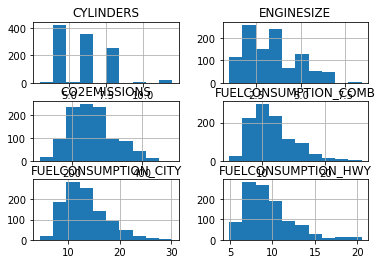

In [43]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
viz.hist()
plt.show()

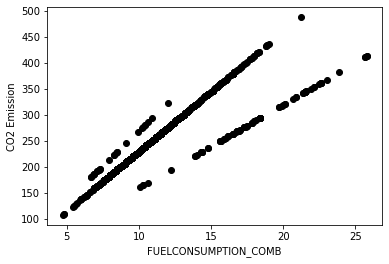

In [44]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='black')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emission")
plt.show()

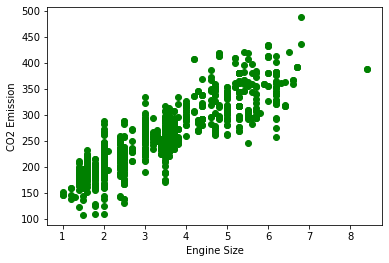

In [49]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

#### Práctica
dibuja CYLINDER vs la Emisión, para ver cuán lineal es su relación:

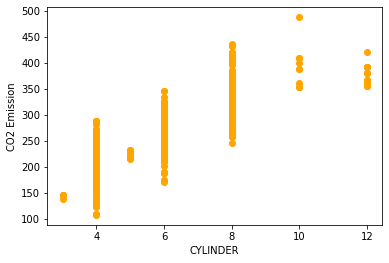

In [46]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='orange')
plt.xlabel("CYLINDER")
plt.ylabel("CO2 Emission")
plt.show()

#### Creando el set de datos de entrenamiento y de prueba


In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Entrenar distribución de los datos

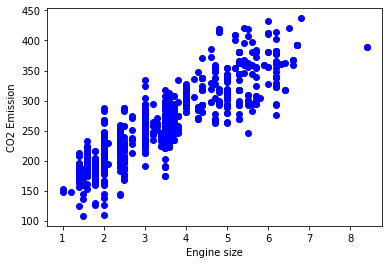

In [47]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

#### Modeling

In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_[0][0])
print ('Intercept: ',regr.intercept_[0])

Coefficients:  38.64831033364237
Intercept:  126.94825218294639


#### Trazar las salidas

Text(0, 0.5, 'CO2 Emission')

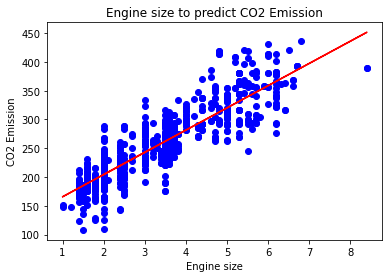

In [59]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, (regr.coef_[0][0]*train_x + regr.intercept_[0]), '-r')
plt.title("Engine size to predict CO2 Emission")
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

#### Evaluación

In [40]:
from sklearn.metrics import r2_score
print("Usando ENGINESIZE para predecir CO2EMISSIONS")
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) **
2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Usando ENGINESIZE para predecir CO2EMISSIONS
Error medio absoluto: 26.02
Suma residual de los cuadrados (MSE): 1196.20
R2-score: 0.60


#### Polinomio generado por el modelo de regresión.

In [38]:
print("El modelo generado por la regresión es: \n CO2EMISSIONS=",regr.coef_[0][0],"*ENGINESIZE +",regr.intercept_[0])

El modelo generado por la regresión es: 
 CO2EMISSIONS= 38.64831033364237 *ENGINESIZE + 126.94825218294639


#### Análisis de la precisión del modelo.

Para los algoritmos de regresión, las métricas más típicas de la precisión de los modelos son:
- el Error medio absoluto, 
- la Suma residual de los cuadrados y
- el R2-score. 

Estas métricas miden la distancia entre el destino numérico predicho y la respuesta numérica real (dato real). Para este caso los resultados fueron:
    

In [51]:
print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) **
2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 26.02
Suma residual de los cuadrados (MSE): 1196.20
R2-score: 0.60


#### Reto

In [54]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print(regr.coef_)
print(regr.intercept_)

[[11.7145021   6.90667968  9.43941011]]
[67.78093911]
